# Real estate market analysis

At your disposal is the data of the Yandex.Realty service - an archive of ads for the sale of apartments in St. Petersburg and neighboring settlements for several years. 

Count and add to the table: price per square meter; day of the week, month and year of publication of the announcement;
floor of the apartment; options - first, last, other; the ratio of residential and total area, as well as the ratio of kitchen area to total.

Examine the following parameters: area, price, number of rooms, ceiling height. Plot histograms for each parameter.

Study the time of sale of the apartment. Plot a histogram. Calculate the mean and median. Describe how long a sale usually takes. When can sales be considered very fast, and when unusually long?

Remove rare and outliers. Describe what features you found.

What factors most affect the value of an apartment? Find out if the price depends on the area, number of rooms, distance from the center. Study the dependence of the price on which floor the apartment is located on: first, last or another. Also study the dependence on the date of placement: day of the week, month and year.

Select the 10 locations with the most ads. Calculate the average price per square meter in these settlements. Select among them the settlements with the highest and lowest cost of housing. This data can be found by name in the 'locality_name' column.

Look at the offer of apartments: for each apartment there is information about the distance to the center. Highlight apartments in St. Petersburg ('locality_name'). Your task is to find out which area is included in the center. Create a column with the distance to the center in kilometers: round to whole numbers. After that, calculate the average price for each kilometer. Build a graph: it should show how the price depends on the distance from the center. Define the border where the graph changes a lot - this will be the central zone.

Select a segment of apartments in the center. Analyze this territory and study the following parameters: area, price, number of rooms, ceiling height. Also highlight the factors that affect the cost of the apartment (number of rooms, floor, distance from the center, date of placement of the ad). Draw your own conclusions. Do they differ from the general findings throughout the city?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

## Data preprocessing

In [2]:
data=pd.read_csv('real_estate_data.csv', sep='\t')

In [3]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

1.Need to delete rows, where locality_name= na

2.Need to fill missing values of column 'is_apartment' with 0(not filled=not apartm)

3.Need to fill missing values of column 'balcony' with 0



In [5]:
data.duplicated().sum()

0

In [6]:
data=data.dropna(subset='locality_name')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  int64  
 1   last_price            23650 non-null  float64
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  int64  
 5   ceiling_height        14490 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           21752 non-null  float64
 8   floor                 23650 non-null  int64  
 9   is_apartment          2760 non-null   object 
 10  studio                23650 non-null  bool   
 11  open_plan             23650 non-null  bool   
 12  kitchen_area          21381 non-null  float64
 13  balcony               12137 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [8]:
data['is_apartment']=data['is_apartment'].fillna(0)

In [9]:
#transforming to boolean
data['is_apartment']=data['is_apartment'].astype('bool')

In [10]:
data['balcony']=data['balcony'].fillna(0)

## 1st Task
Count and add to the table: price per square meter; day of the week, month and year of publication of the announcement; floor of the apartment; options - first, last, other; the ratio of residential and total area, as well as the ratio of kitchen area to total.

In [11]:
#adding the column price per square meter
data['price m2']=(data['last_price']/data['total_area']).round(2)

In [12]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price m2
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,False,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,False,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,False,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00


In [13]:
#changing the data type to datetime
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format="%Y-%m-%dT%H:%M:%S")

In [14]:
#adding day,month,year columns
data['day_of_week']=data['first_day_exposition'].dt.weekday
data['month']=data['first_day_exposition'].dt.month
data['year']=data['first_day_exposition'].dt.year

In [15]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price m2,day_of_week,month,year
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,...,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,1,6,2018


In [16]:
#function to define the floor 
def floors(row):
    if row['floor']==1:
        return 'First'
    elif row['floor']==row['floors_total']:
        return 'Last'
    else:
        return 'Other'

In [17]:
data['floor_type']=data.apply(floors, axis=1)

In [18]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price m2,day_of_week,month,year,floor_type
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,1.0,482.0,2.0,755.0,NaN,120370.37,3,3,2019,Other
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,0.0,NaN,0.0,NaN,81.0,82920.79,1,12,2018,First
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,1.0,90.0,2.0,574.0,558.0,92785.71,3,8,2015,Other
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,...,2.0,84.0,3.0,234.0,424.0,408176.10,4,7,2015,Other
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,2.0,112.0,1.0,48.0,121.0,100000.00,1,6,2018,Other


In [19]:
# adding columns
data['living_area_ratio']=(data['living_area']/data['total_area']).round(2)
data['kitchen_area_ratio']=(data['kitchen_area']/data['total_area']).round(2)

In [20]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price m2,day_of_week,month,year,floor_type,living_area_ratio,kitchen_area_ratio
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,2.0,755.0,NaN,120370.37,3,3,2019,Other,0.47,0.23
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,0.0,NaN,81.0,82920.79,1,12,2018,First,0.46,0.27
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,2.0,574.0,558.0,92785.71,3,8,2015,Other,0.61,0.15
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,...,3.0,234.0,424.0,408176.10,4,7,2015,Other,NaN,NaN
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,1.0,48.0,121.0,100000.00,1,6,2018,Other,0.32,0.41


## 2nd task
Examine the following parameters: area, price, number of rooms, ceiling height. Plot histograms for each parameter.

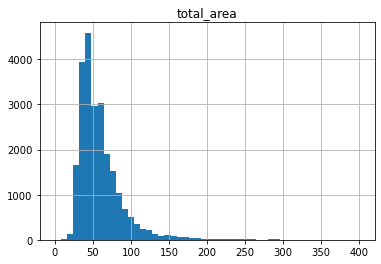

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

In [21]:
data.hist('total_area', bins=50, range=(0,400))
plt.show()
data['total_area'].describe()

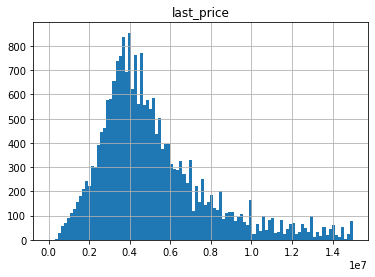

count    2.365000e+04
mean     6.541127e+06
std      1.089640e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [22]:
data.hist('last_price', bins=100, range=(0,15000000))
plt.show()
data['last_price'].describe()

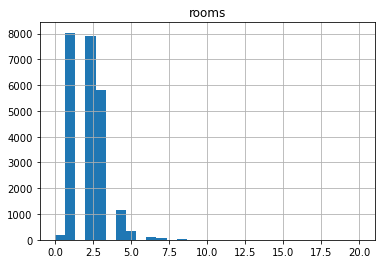

count    23650.000000
mean         2.070106
std          1.078620
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [23]:
data.hist('rooms', bins=30, range=(0,20))
plt.show()
data['rooms'].describe()

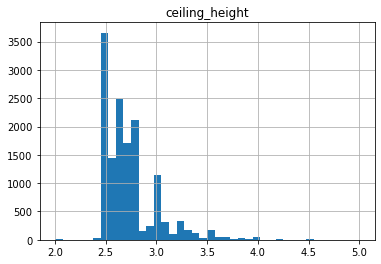

count    14490.000000
mean         2.771287
std          1.261593
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [24]:
data.hist('ceiling_height', bins=40, range=(2,5))
plt.show()
data['ceiling_height'].describe()

## 3rd task
Study the time of sale of the apartment. Plot a histogram. Calculate the mean and median. Describe how long a sale usually takes. When can sales be considered very fast, and when unusually long?

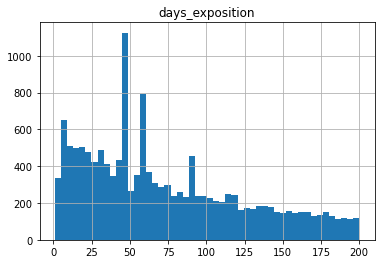

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [25]:
data.hist('days_exposition', bins=50, range=(1,200))
plt.show()
data['days_exposition'].describe()

In [26]:
data['days_exposition'].value_counts().head(10)

45.0    879
60.0    538
7.0     234
30.0    208
90.0    203
4.0     174
3.0     158
5.0     152
14.0    148
9.0     142
Name: days_exposition, dtype: int64

## 4th task
Remove rare and outliers. Describe what features you found.

In [27]:
#deleting values at 7,30,45,60,90 days - it was auto deleted from the platform
delete_list=[7,30,45,60,90]

In [28]:
good_data=data.query('days_exposition not in @delete_list')

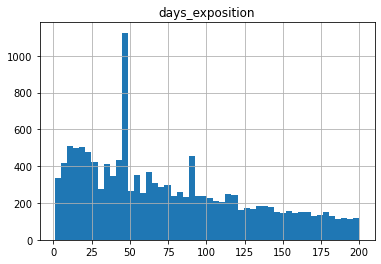

count    19490.000000
mean       187.781426
std        222.877194
min          1.000000
25%         45.000000
50%        104.000000
75%        244.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [29]:
good_data.hist('days_exposition', bins=50, range=(1,200))
plt.show()
good_data['days_exposition'].describe()

## 5th task
What factors most affect the value of an apartment? Find out if the price depends on the area, number of rooms, distance from the center. Study the dependence of the price on which floor the apartment is located on: first, last or another. Also study the dependence on the date of placement: day of the week, month and year.

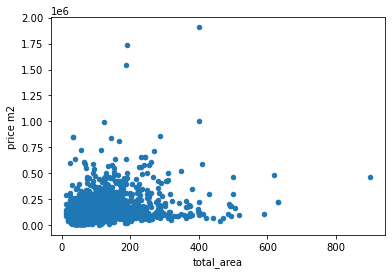

0.3083909441641016

In [30]:
#price/total area relation
good_data.plot(x='total_area', y='price m2', kind='scatter')
plt.show()
good_data['total_area'].corr(data['price m2'])

0.06222809238062505

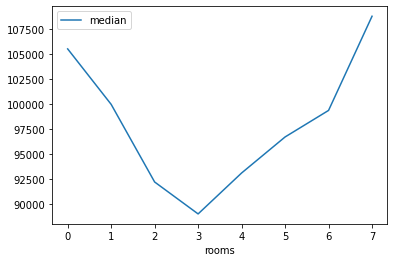

In [31]:
#price/number of rooms relation
pivot_table_rooms=good_data.pivot_table(index='rooms', values='price m2', aggfunc=['median','count'])
pivot_table_rooms.columns=['median', 'count']
pivot_table_rooms.query('count > 50').plot(y = 'median')
good_data['rooms'].corr(data['price m2'])

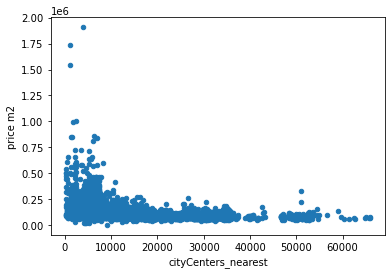

-0.31903181786999385

In [32]:
#price/distance from center relation
good_data.plot(x='cityCenters_nearest', y='price m2', kind='scatter')
plt.show()
good_data['cityCenters_nearest'].corr(data['price m2'])

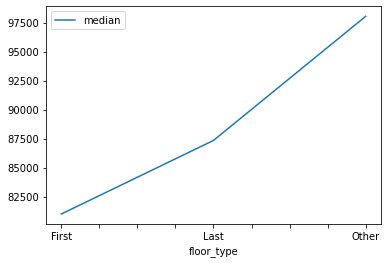

In [46]:
#price/floor relation
pivot_table_floor=good_data.pivot_table(index='floor_type', values='price m2', aggfunc='median')
pivot_table_floor.columns=['median']
pivot_table_floor.plot(y='median')
plt.show()

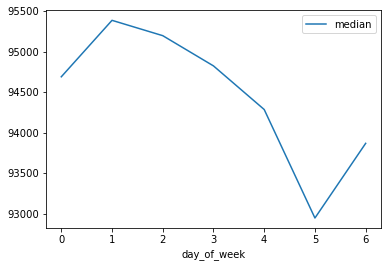

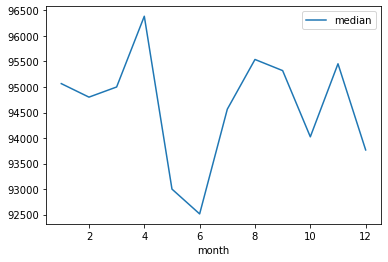

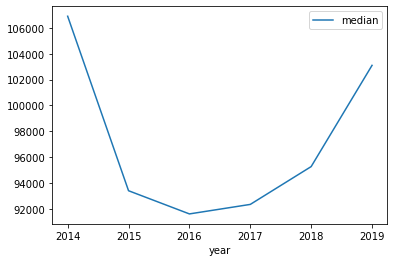

In [34]:
#price/week,month,year of publishing relation
pivot_dow=good_data.pivot_table(index='day_of_week', values='price m2', aggfunc='median')
pivot_dow.columns=['median']
pivot_dow.plot(y='median')
plt.show()
pivot_month=good_data.pivot_table(index='month', values='price m2', aggfunc='median')
pivot_month.columns=['median']
pivot_month.plot(y='median')
plt.show()
pivot_year=good_data.pivot_table(index='year', values='price m2', aggfunc='median')
pivot_year.columns=['median']
pivot_year.plot(y='median')
plt.show()

## 6th task 
Select the 10 locations with the most ads. Calculate the average price per square meter in these settlements. Select among them the settlements with the highest and lowest cost of housing. This data can be found by name in the 'locality_name' column.

In [47]:
pivot_top=good_data.pivot_table(index='locality_name', values='price m2', aggfunc=['mean', 'count'])
pivot_top.columns=['mean','count']
pivot_top.sort_values(by='count', ascending=False).head(10)

,mean,count
locality_name,,
Санкт-Петербург,115139.069928,14983
посёлок Мурино,85662.799620,500
посёлок Шушары,78645.535649,416
Всеволожск,68523.734961,387
Пушкин,103455.211299,354
Колпино,75506.532226,328
посёлок Парголово,90174.947613,310
Гатчина,68556.911486,296
деревня Кудрово,92484.205789,285


## 7th Task
Look at the offer of apartments: for each apartment there is information about the distance to the center. Highlight apartments in St. Petersburg ('locality_name'). Your task is to find out which area is included in the center. Create a column with the distance to the center in kilometers: round to whole numbers. After that, calculate the average price for each kilometer. Build a graph: it should show how the price depends on the distance from the center. Define the border where the graph changes a lot - this will be the central zone.


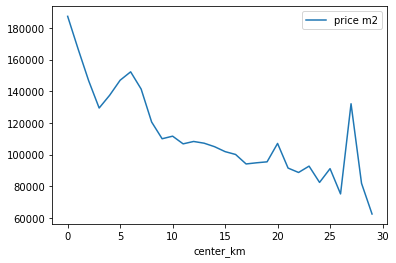

In [50]:
data['center_km'] = data['cityCenters_nearest']/1000
data['center_km']=data['center_km'].fillna(99999)
data['center_km']=data['center_km'].astype('int')
pivot_table_center=data.query('locality_name == "Санкт-Петербург" and center_km !=99999').\
pivot_table(index='center_km', values='price m2', aggfunc='mean')

pivot_table_center.plot()
plt.show()

## 8th Task
Select a segment of apartments in the center. Analyze this territory and study the following parameters: area, price, number of rooms, ceiling height. Also highlight the factors that affect the cost of the apartment (number of rooms, floor, distance from the center, date of placement of the ad). Draw your own conclusions. Do they differ from the general findings throughout the city?

In [40]:
spb_center=data.query('center_km<5 and locality_name == "Санкт-Петербург"')

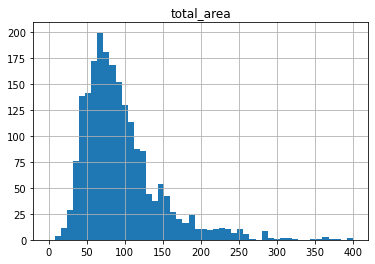

count    2066.000000
mean       96.856873
std        58.185692
min        12.000000
25%        61.325000
50%        83.400000
75%       114.650000
max       631.200000
Name: total_area, dtype: float64

In [42]:
#apartment area
spb_center.hist('total_area', bins=50, range=(0,400))
plt.show()
spb_center['total_area'].describe()

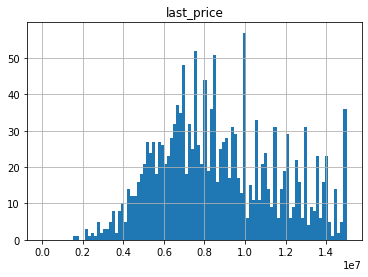

count    2.066000e+03
mean     1.497309e+07
std      2.643824e+07
min      1.600000e+06
25%      7.000000e+06
50%      9.700000e+06
75%      1.450000e+07
max      7.630000e+08
Name: last_price, dtype: float64

In [43]:
spb_center.hist('last_price', bins=100, range=(0,15000000))
plt.show()
spb_center['last_price'].describe()

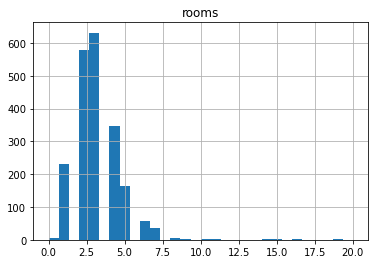

count    2066.000000
mean        3.025653
std         1.523606
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        19.000000
Name: rooms, dtype: float64

In [44]:
spb_center.hist('rooms', bins=30, range=(0,20))
plt.show()
spb_center['rooms'].describe()

<AxesSubplot:title={'center':'Ceiling Height full'}, ylabel='Frequency'>

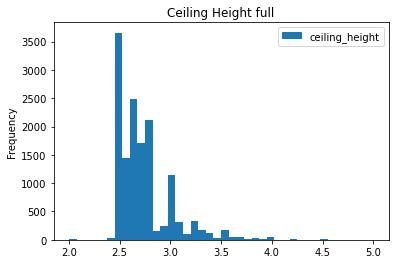

In [45]:
data.plot(y='ceiling_height',kind='hist', bins=40, range=(2,5), title='Ceiling Height full')